In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-05-05 00:12:06.193320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
com='GENERAL_ELC'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end,interval = '1h')
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-05 09:30:00-04:00,170.975006,173.750000,170.759995,173.365005,173.365005,40825650,APPLE
2023-05-05 10:30:00-04:00,173.369995,174.199997,173.179993,173.837708,173.837708,17046322,APPLE
2023-05-05 11:30:00-04:00,173.839996,174.050003,173.229996,173.259995,173.259995,9463520,APPLE
2023-05-05 12:30:00-04:00,173.264999,173.639999,173.210007,173.639999,173.639999,8365498,APPLE
2023-05-05 13:30:00-04:00,173.645004,174.092499,173.642395,174.080002,174.080002,7436685,APPLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-05 09:30:00-04:00,170.975006,173.750000,170.759995,173.365005,173.365005,40825650,APPLE
1,2023-05-05 10:30:00-04:00,173.369995,174.199997,173.179993,173.837708,173.837708,17046322,APPLE
2,2023-05-05 11:30:00-04:00,173.839996,174.050003,173.229996,173.259995,173.259995,9463520,APPLE
3,2023-05-05 12:30:00-04:00,173.264999,173.639999,173.210007,173.639999,173.639999,8365498,APPLE
4,2023-05-05 13:30:00-04:00,173.645004,174.092499,173.642395,174.080002,174.080002,7436685,APPLE
...,...,...,...,...,...,...,...,...
17485,2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
17486,2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
17487,2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC
17488,2024-05-03 14:30:00-04:00,164.300003,164.589996,164.110001,164.220001,164.220001,464263,GENERAL_ELC


In [11]:
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-05 09:30:00-04:00,170.975006,173.750000,170.759995,173.365005,173.365005,40825650,APPLE
2023-05-05 10:30:00-04:00,173.369995,174.199997,173.179993,173.837708,173.837708,17046322,APPLE
2023-05-05 11:30:00-04:00,173.839996,174.050003,173.229996,173.259995,173.259995,9463520,APPLE
2023-05-05 12:30:00-04:00,173.264999,173.639999,173.210007,173.639999,173.639999,8365498,APPLE
2023-05-05 13:30:00-04:00,173.645004,174.092499,173.642395,174.080002,174.080002,7436685,APPLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,179.610001,180.880005,179.509995,179.960098,179.960098,9146702,TESLA
2024-05-03 12:30:00-04:00,179.949997,181.449295,179.759995,181.330002,181.330002,7057860,TESLA
2024-05-03 13:30:00-04:00,181.389999,181.830002,180.619995,181.500000,181.500000,6323332,TESLA


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2023-05-05 09:30:00-04:00,173.365005
2023-05-05 10:30:00-04:00,173.837708
2023-05-05 11:30:00-04:00,173.259995
2023-05-05 12:30:00-04:00,173.639999
2023-05-05 13:30:00-04:00,174.080002
...,...
2024-05-03 11:30:00-04:00,179.960098
2024-05-03 12:30:00-04:00,181.330002
2024-05-03 13:30:00-04:00,181.500000


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

14954

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.49291809],
       [-0.49139421],
       [-0.49325662],
       ...,
       [-0.46669279],
       [-0.4669507 ],
       [-0.46769215]])

In [16]:
train_set, test_set = scaled_data[:training_data_len], scaled_data[training_data_len:]

In [17]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-05 09:30:00-04:00,80.271347,81.213089,80.047882,80.235435,80.235435,1051355,GENERAL_ELC
2023-05-05 10:30:00-04:00,80.239426,80.323387,79.720749,79.848366,79.848366,641930,GENERAL_ELC
2023-05-05 11:30:00-04:00,79.860336,79.960098,79.608940,79.832405,79.832405,487887,GENERAL_ELC
2023-05-05 12:30:00-04:00,79.840385,80.031921,79.824425,79.920189,79.920189,409846,GENERAL_ELC
2023-05-05 13:30:00-04:00,79.920189,80.015961,79.812447,79.972069,79.972069,636583,GENERAL_ELC
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC


In [18]:
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()

/Users/sridhar/opt/anaconda3/envs/Neural/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sridhar/opt/anaconda3/envs/Neural/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction

In [20]:
residuals.shape

(787, 787)

In [21]:
X_train = residuals[:-1].reshape(-1, 1)
y_train = residuals[1:].reshape(-1, 1)

In [22]:
ann_model = Sequential()
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [23]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = ann_model.fit(X_train, y_train, batch_size=1, epochs=1)

618582/618582 [==============================] - 352s 569us/step - loss: 6.7756e-05


In [25]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [26]:
dataset

,Close
Datetime,
2023-05-05 09:30:00-04:00,173.365005
2023-05-05 10:30:00-04:00,173.837708
2023-05-05 11:30:00-04:00,173.259995
2023-05-05 12:30:00-04:00,173.639999
2023-05-05 13:30:00-04:00,174.080002
...,...
2024-05-03 11:30:00-04:00,179.960098
2024-05-03 12:30:00-04:00,181.330002
2024-05-03 13:30:00-04:00,181.500000


In [27]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2023-11-21 09:30:00-05:00,240.172699
2023-11-21 10:30:00-05:00,241.959900
2023-11-21 11:30:00-05:00,241.432800
2023-11-21 12:30:00-05:00,240.350006
2023-11-21 13:30:00-05:00,241.729996
...,...
2024-05-03 11:30:00-04:00,179.960098
2024-05-03 12:30:00-04:00,181.330002
2024-05-03 13:30:00-04:00,181.500000


In [28]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [29]:
x_test = np.array(x_test)

In [30]:
x_test

array([[-0.34261011, -0.33951533, -0.33632379, ..., -0.29613958,
        -0.28909567, -0.29193255],
       [-0.33951533, -0.33632379, -0.33580797, ..., -0.28909567,
        -0.29193255, -0.27754588],
       [-0.33632379, -0.33580797, -0.36198462, ..., -0.29193255,
        -0.27754588, -0.27178437],
       ...,
       [-0.58513388, -0.58223247, -0.57829982, ..., -0.47279185,
        -0.47165707, -0.46724083],
       [-0.58223247, -0.57829982, -0.58210354, ..., -0.47165707,
        -0.46724083, -0.46669279],
       [-0.57829982, -0.58210354, -0.58302424, ..., -0.46724083,
        -0.46669279, -0.4669507 ]])

In [31]:
x_test_mean_array = []
for sub in x_test:
    x_test_mean = np.mean(sub)
    x_test_mean_array.append(x_test_mean)

In [32]:
predictions = ann_model.predict(x_test_mean_array)
predictions

25/25 [==============================] - 0s 518us/step


array([[-0.31863442],
       [-0.31754866],
       [-0.31641835],
       [-0.3153697 ],
       [-0.31438792],
       [-0.31289503],
       [-0.31140476],
       [-0.3097118 ],
       [-0.30835664],
       [-0.3071243 ],
       [-0.3058228 ],
       [-0.30452257],
       [-0.30312183],
       [-0.30190673],
       [-0.30075005],
       [-0.2995628 ],
       [-0.2983269 ],
       [-0.29712087],
       [-0.2960747 ],
       [-0.29530403],
       [-0.29458246],
       [-0.2938684 ],
       [-0.2930658 ],
       [-0.29243353],
       [-0.2917839 ],
       [-0.29113555],
       [-0.29069778],
       [-0.2902372 ],
       [-0.2897131 ],
       [-0.2892132 ],
       [-0.28871402],
       [-0.28823918],
       [-0.28749746],
       [-0.28731477],
       [-0.2871602 ],
       [-0.28698745],
       [-0.28677577],
       [-0.28681695],
       [-0.28680998],
       [-0.28678235],
       [-0.28663316],
       [-0.28638643],
       [-0.2861761 ],
       [-0.28584188],
       [-0.2854462 ],
       [-0

In [33]:
len(predictions)

787

In [34]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [35]:
predictions = scaler.inverse_transform(predictions)

In [36]:
mse = np.mean(predictions -f_app)
mse

122.3068873487563

In [37]:
predictions

array([[227.42719],
       [227.76398],
       [228.1146 ],
       [228.43988],
       [228.74442],
       [229.20752],
       [229.66978],
       [230.19493],
       [230.6153 ],
       [230.99759],
       [231.40129],
       [231.80461],
       [232.23914],
       [232.61604],
       [232.97485],
       [233.34312],
       [233.72649],
       [234.1006 ],
       [234.42513],
       [234.66418],
       [234.88802],
       [235.10951],
       [235.35847],
       [235.55461],
       [235.75612],
       [235.95723],
       [236.09303],
       [236.23589],
       [236.39847],
       [236.55354],
       [236.70839],
       [236.85567],
       [237.08574],
       [237.14241],
       [237.19038],
       [237.24396],
       [237.30962],
       [237.29684],
       [237.299  ],
       [237.30759],
       [237.35385],
       [237.43039],
       [237.49564],
       [237.5993 ],
       [237.72205],
       [237.84319],
       [237.83913],
       [237.92989],
       [237.99171],
       [238.0616 ],


In [38]:
import random
random.random()

0.11585512416268484

In [39]:
  Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [40]:
  Final_pred

array([[156.64717 ],
       [156.98396 ],
       [157.33458 ],
       [157.65987 ],
       [157.9644  ],
       [158.4275  ],
       [158.88976 ],
       [159.4149  ],
       [159.83528 ],
       [160.21758 ],
       [160.62126 ],
       [161.02458 ],
       [161.45912 ],
       [161.83601 ],
       [162.19484 ],
       [162.5631  ],
       [162.94646 ],
       [163.32057 ],
       [163.6451  ],
       [163.88417 ],
       [164.10799 ],
       [164.32948 ],
       [164.57845 ],
       [164.77458 ],
       [164.97609 ],
       [165.1772  ],
       [165.313   ],
       [165.45586 ],
       [165.61845 ],
       [165.77351 ],
       [165.92836 ],
       [166.07564 ],
       [166.30571 ],
       [166.36238 ],
       [166.41035 ],
       [166.46394 ],
       [166.52959 ],
       [166.51683 ],
       [166.51897 ],
       [166.52757 ],
       [166.57384 ],
       [166.65038 ],
       [166.71562 ],
       [166.81929 ],
       [166.94203 ],
       [167.06316 ],
       [167.0591  ],
       [167.1

In [41]:
    train = df_rest
    data = df_app['Close'].values
    len(data)

1749

In [42]:
    len(data[138:252])

114

In [43]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [44]:
    valid

,Close_app,Predictions
0,80.235435,156.647171
1,79.848366,156.983963
2,79.832405,157.334579
3,79.920189,157.659866
4,79.972069,157.964401
...,...,...
782,87.845169,100.409210
783,87.334396,101.036926
784,86.256981,101.692856
785,87.001442,102.306061


In [45]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-05 09:30:00-04:00,170.975006,173.750000,170.759995,173.365005,173.365005,40825650,APPLE
1,2023-05-05 10:30:00-04:00,173.369995,174.199997,173.179993,173.837708,173.837708,17046322,APPLE
2,2023-05-05 11:30:00-04:00,173.839996,174.050003,173.229996,173.259995,173.259995,9463520,APPLE
3,2023-05-05 12:30:00-04:00,173.264999,173.639999,173.210007,173.639999,173.639999,8365498,APPLE
4,2023-05-05 13:30:00-04:00,173.645004,174.092499,173.642395,174.080002,174.080002,7436685,APPLE
...,...,...,...,...,...,...,...,...
17485,2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
17486,2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
17487,2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC
17488,2024-05-03 14:30:00-04:00,164.300003,164.589996,164.110001,164.220001,164.220001,464263,GENERAL_ELC


In [46]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2023-05-05 09:30:00-04:00,173.365005
1,2023-05-05 10:30:00-04:00,173.837708
2,2023-05-05 11:30:00-04:00,173.259995
3,2023-05-05 12:30:00-04:00,173.639999
4,2023-05-05 13:30:00-04:00,174.080002
...,...,...
17485,2024-05-03 11:30:00-04:00,164.289993
17486,2024-05-03 12:30:00-04:00,164.110001
17487,2024-05-03 13:30:00-04:00,164.300003
17488,2024-05-03 14:30:00-04:00,164.220001


In [47]:
    dfxf['Datetime']

0        2023-05-05 09:30:00-04:00
1        2023-05-05 10:30:00-04:00
2        2023-05-05 11:30:00-04:00
3        2023-05-05 12:30:00-04:00
4        2023-05-05 13:30:00-04:00
                   ...            
17485    2024-05-03 11:30:00-04:00
17486    2024-05-03 12:30:00-04:00
17487    2024-05-03 13:30:00-04:00
17488    2024-05-03 14:30:00-04:00
17489    2024-05-03 15:30:00-04:00
Name: Datetime, Length: 17490, dtype: object

In [48]:
    import datetime
    def str_to_datetime(s):
      split = s.split('-')
      year, month, day = int(split[0]), int(split[1]), int(split[2])
      return datetime.datetime(year=year, month=month, day=day)
    datetime_object = str_to_datetime('1986-03-19')
    datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [49]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2023-05-05 09:30:00-04:00,173.365005
2023-05-05 10:30:00-04:00,173.837708
2023-05-05 11:30:00-04:00,173.259995
2023-05-05 12:30:00-04:00,173.639999
2023-05-05 13:30:00-04:00,174.080002
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


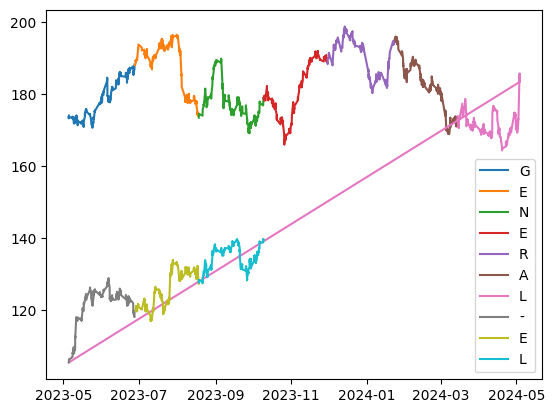

In [50]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [51]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-05 09:30:00-04:00,80.271347,81.213089,80.047882,80.235435,80.235435,1051355,GENERAL_ELC
2023-05-05 10:30:00-04:00,80.239426,80.323387,79.720749,79.848366,79.848366,641930,GENERAL_ELC
2023-05-05 11:30:00-04:00,79.860336,79.960098,79.608940,79.832405,79.832405,487887,GENERAL_ELC
2023-05-05 12:30:00-04:00,79.840385,80.031921,79.824425,79.920189,79.920189,409846,GENERAL_ELC
2023-05-05 13:30:00-04:00,79.920189,80.015961,79.812447,79.972069,79.972069,636583,GENERAL_ELC
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC


In [52]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [53]:
    df_app_c

,Close
Datetime,
2023-05-05 09:30:00-04:00,80.235435
2023-05-05 10:30:00-04:00,79.848366
2023-05-05 11:30:00-04:00,79.832405
2023-05-05 12:30:00-04:00,79.920189
2023-05-05 13:30:00-04:00,79.972069
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [54]:
    dfxfs

,Close
Datetime,
2023-05-05 09:30:00-04:00,173.365005
2023-05-05 10:30:00-04:00,173.837708
2023-05-05 11:30:00-04:00,173.259995
2023-05-05 12:30:00-04:00,173.639999
2023-05-05 13:30:00-04:00,174.080002
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [55]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2023-05-05 09:30:00-04:00,80.235435
2023-05-05 10:30:00-04:00,79.848366
2023-05-05 11:30:00-04:00,79.832405
2023-05-05 12:30:00-04:00,79.920189
2023-05-05 13:30:00-04:00,79.972069
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [56]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2023-05-05 09:30:00-04:00,80.235435
2023-05-05 10:30:00-04:00,79.848366
2023-05-05 11:30:00-04:00,79.832405
2023-05-05 12:30:00-04:00,79.920189
2023-05-05 13:30:00-04:00,79.972069
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [57]:
dfxfs

,Close
Datetime,
2023-05-05 09:30:00-04:00,173.365005
2023-05-05 10:30:00-04:00,173.837708
2023-05-05 11:30:00-04:00,173.259995
2023-05-05 12:30:00-04:00,173.639999
2023-05-05 13:30:00-04:00,174.080002
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [58]:
df_mse_a

,Close
Datetime,
2023-05-05 09:30:00-04:00,80.235435
2023-05-05 10:30:00-04:00,79.848366
2023-05-05 11:30:00-04:00,79.832405
2023-05-05 12:30:00-04:00,79.920189
2023-05-05 13:30:00-04:00,79.972069
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [59]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index

In [60]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index
val = dfxfs_values - df_mse_a_values

values = {'Close': val}
mseallf = pd.DataFrame(values, index=index_dfxfs)


In [61]:
    mseallf

,Close
Datetime,
2023-05-05 09:30:00-04:00,93.129570
2023-05-05 10:30:00-04:00,93.989342
2023-05-05 11:30:00-04:00,93.427589
2023-05-05 12:30:00-04:00,93.719810
2023-05-05 13:30:00-04:00,94.107933
...,...
2024-05-03 11:30:00-04:00,0.000000
2024-05-03 12:30:00-04:00,0.000000
2024-05-03 13:30:00-04:00,0.000000


In [62]:
for i in range(1,len(dfxfs)):
    if (mseallf.iloc[i,0]>=0):
        final_df = dfxfs+mseallf
    else:
        final_df = dfxfs-mseallf
final_df

,Close
Datetime,
2023-05-05 09:30:00-04:00,266.494576
2023-05-05 10:30:00-04:00,267.827049
2023-05-05 11:30:00-04:00,266.687584
2023-05-05 12:30:00-04:00,267.359810
2023-05-05 13:30:00-04:00,268.187935
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [63]:
sdx = final_df[251:2500]
sdx

,Close
Datetime,
2023-06-27 15:30:00-04:00,292.376877
2023-06-28 09:30:00-04:00,291.836006
2023-06-28 10:30:00-04:00,292.874374
2023-06-28 11:30:00-04:00,293.118362
2023-06-28 12:30:00-04:00,292.880638
...,...
2023-10-09 10:30:00-04:00,189.507629
2023-10-09 11:30:00-04:00,189.427620
2023-10-09 12:30:00-04:00,190.026642


In [64]:
datasetx = final_df.iloc[251:2500]

In [65]:
training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
training_data_lenx

2137

In [66]:
datasetx

,Close
Datetime,
2023-06-27 15:30:00-04:00,292.376877
2023-06-28 09:30:00-04:00,291.836006
2023-06-28 10:30:00-04:00,292.874374
2023-06-28 11:30:00-04:00,293.118362
2023-06-28 12:30:00-04:00,292.880638
...,...
2023-10-09 10:30:00-04:00,189.507629
2023-10-09 11:30:00-04:00,189.427620
2023-10-09 12:30:00-04:00,190.026642


In [67]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_datax = scaler.fit_transform(datasetx)
scaled_datax

array([[ 0.8746326 ],
       [ 0.86836571],
       [ 0.88039693],
       ...,
       [-0.31126488],
       [-0.2944563 ],
       [-0.29841597]])

In [68]:
train_datax = scaled_datax[0:int(training_data_lenx), :]

In [69]:
x_trainx = []
y_trainx = []

In [70]:
for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])

In [71]:
x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

In [72]:
x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))

In [73]:
len(x_trainx)

2077

In [74]:
sdx

,Close
Datetime,
2023-06-27 15:30:00-04:00,292.376877
2023-06-28 09:30:00-04:00,291.836006
2023-06-28 10:30:00-04:00,292.874374
2023-06-28 11:30:00-04:00,293.118362
2023-06-28 12:30:00-04:00,292.880638
...,...
2023-10-09 10:30:00-04:00,189.507629
2023-10-09 11:30:00-04:00,189.427620
2023-10-09 12:30:00-04:00,190.026642


In [75]:
x_trainx.shape[0]

2077

In [76]:
xtrainfinal = np.array(sdx)
xtrainfinal.shape[1]

1

In [77]:
xtrainfinal.shape[0]

2249

In [78]:
train_set, test_set = scaled_datax[:training_data_lenx], scaled_datax[training_data_lenx:]
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction
x_trainx = residuals[:-1].reshape(-1, 1)
y_trainx = residuals[1:].reshape(-1, 1)

/Users/sridhar/opt/anaconda3/envs/Neural/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sridhar/opt/anaconda3/envs/Neural/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [79]:
ann_modelx = Sequential()
ann_modelx.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_modelx.add(Dense(1))
ann_modelx.compile(loss='mean_squared_error', optimizer='adam')
ann_modelx.fit(x_trainx, y_trainx, epochs=100, batch_size=10, verbose=0)

In [80]:
ann_modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
historyx = ann_modelx.fit(x_trainx, y_trainx, batch_size=2, epochs=1)

6216/6216 [==============================] - 3s 547us/step - loss: 2.8064e-04


In [82]:
test_datax = scaled_datax[training_data_lenx - 60: , :]
x_testx = []

In [83]:
y_testx = datasetx[training_data_lenx:len(datasetx)]
y_testx

,Close
Datetime,
2023-09-15 15:30:00-04:00,184.477203
2023-09-18 09:30:00-04:00,186.355408
2023-09-18 10:30:00-04:00,184.878891
2023-09-18 11:30:00-04:00,184.798813
2023-09-18 12:30:00-04:00,184.608246
...,...
2023-10-09 10:30:00-04:00,189.507629
2023-10-09 11:30:00-04:00,189.427620
2023-10-09 12:30:00-04:00,190.026642


In [84]:
for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])

In [85]:
x_testx = np.array(x_testx)

In [86]:
x_testx

array([[-0.40096701, -0.3970709 , -0.38131083, ..., -0.38151264,
        -0.38576632, -0.37844156],
       [-0.3970709 , -0.38131083, -0.38410203, ..., -0.38576632,
        -0.37844156, -0.37556435],
       [-0.38131083, -0.38410203, -0.38846011, ..., -0.37844156,
        -0.37556435, -0.35380223],
       ...,
       [-0.52974335, -0.51991389, -0.5214157 , ..., -0.31662347,
        -0.3172785 , -0.31820555],
       [-0.51991389, -0.5214157 , -0.51570352, ..., -0.3172785 ,
        -0.31820555, -0.31126488],
       [-0.5214157 , -0.51570352, -0.51768243, ..., -0.31820555,
        -0.31126488, -0.2944563 ]])

In [87]:
x_test_mean_arrayx = []
for sub in x_testx:
    x_test_mean = np.mean(sub)
    x_test_mean_arrayx.append(x_test_mean)

In [88]:
predictionsx = ann_modelx.predict(x_test_mean_arrayx)
predictionsx

4/4 [==============================] - 0s 917us/step


array([[-0.2681091 ],
       [-0.26791853],
       [-0.26759386],
       [-0.26751578],
       [-0.26742378],
       [-0.26731563],
       [-0.26689085],
       [-0.26652324],
       [-0.26614898],
       [-0.26580793],
       [-0.26553643],
       [-0.2653165 ],
       [-0.26503035],
       [-0.2646884 ],
       [-0.26439476],
       [-0.26415446],
       [-0.26433107],
       [-0.26469103],
       [-0.2650122 ],
       [-0.26526874],
       [-0.26570094],
       [-0.2662207 ],
       [-0.26688248],
       [-0.26799768],
       [-0.26907468],
       [-0.27011836],
       [-0.27105537],
       [-0.2719914 ],
       [-0.2730102 ],
       [-0.27406   ],
       [-0.27494782],
       [-0.27580154],
       [-0.27657804],
       [-0.27743262],
       [-0.27815306],
       [-0.27866736],
       [-0.27931342],
       [-0.28005126],
       [-0.28067103],
       [-0.28118524],
       [-0.28172937],
       [-0.2822845 ],
       [-0.28286675],
       [-0.28348294],
       [-0.28465474],
       [-0

In [89]:
predictionsx = scaler.inverse_transform(predictionsx)

In [90]:
predictionsx

array([[193.75125],
       [193.76768],
       [193.79572],
       [193.80246],
       [193.81041],
       [193.81973],
       [193.8564 ],
       [193.88812],
       [193.92041],
       [193.94986],
       [193.9733 ],
       [193.99226],
       [194.01695],
       [194.0465 ],
       [194.07182],
       [194.09256],
       [194.07732],
       [194.04626],
       [194.01852],
       [193.99638],
       [193.95909],
       [193.91423],
       [193.85712],
       [193.76086],
       [193.66791],
       [193.57785],
       [193.49698],
       [193.4162 ],
       [193.32825],
       [193.23764],
       [193.16101],
       [193.08736],
       [193.02032],
       [192.94656],
       [192.8844 ],
       [192.84001],
       [192.78426],
       [192.72057],
       [192.66708],
       [192.6227 ],
       [192.57574],
       [192.52782],
       [192.47757],
       [192.42441],
       [192.32327],
       [192.207  ],
       [192.10252],
       [191.9961 ],
       [191.89561],
       [191.78882],


In [91]:
data = final_df['Close']

In [92]:
len(data)

17490

In [93]:
data

Datetime
2023-05-05 09:30:00-04:00    266.494576
2023-05-05 10:30:00-04:00    267.827049
2023-05-05 11:30:00-04:00    266.687584
2023-05-05 12:30:00-04:00    267.359810
2023-05-05 13:30:00-04:00    268.187935
                                ...    
2024-05-03 11:30:00-04:00    164.289993
2024-05-03 12:30:00-04:00    164.110001
2024-05-03 13:30:00-04:00    164.300003
2024-05-03 14:30:00-04:00    164.220001
2024-05-03 15:30:00-04:00    164.110001
Name: Close, Length: 17490, dtype: float64

In [94]:
datax = pd.DataFrame(data)
datax

,Close
Datetime,
2023-05-05 09:30:00-04:00,266.494576
2023-05-05 10:30:00-04:00,267.827049
2023-05-05 11:30:00-04:00,266.687584
2023-05-05 12:30:00-04:00,267.359810
2023-05-05 13:30:00-04:00,268.187935
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [95]:
datax.iloc[1:113,0]

Datetime
2023-05-05 10:30:00-04:00    267.827049
2023-05-05 11:30:00-04:00    266.687584
2023-05-05 12:30:00-04:00    267.359810
2023-05-05 13:30:00-04:00    268.187935
2023-05-05 14:30:00-04:00    267.517365
                                ...    
2023-05-26 12:30:00-04:00    268.279968
2023-05-26 13:30:00-04:00    267.835266
2023-05-26 14:30:00-04:00    268.597198
2023-05-26 15:30:00-04:00    268.732872
2023-05-30 09:30:00-04:00    274.212624
Name: Close, Length: 112, dtype: float64

In [96]:
import random as rand

final_pred = np.zeros(len(predictionsx))
for i in range (0, len(predictionsx)):
    if i<=50:
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
    elif(i>50 & i<90):
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)
    else:
        final_pred[i] = predictionsx[i]+((predictionsx[i]*rand.random()/4)+(predictionsx[i]*2*rand.random()/150)+0.85*(predictionsx[i]*rand.random())/1500)
final_pred

array([195.65092468, 191.2290802 , 193.52333069, 192.50819397,
       191.1725769 , 193.38319397, 193.71264648, 195.28636169,
       191.54412842, 192.83691406, 193.31404114, 190.35319519,
       194.05102539, 192.39042664, 196.50579834, 194.7199707 ,
       191.1844635 , 191.12728882, 191.8952179 , 192.69578552,
       192.50793457, 194.98046875, 194.6144104 , 194.07505798,
       191.81150818, 193.70803833, 191.22911072, 189.18937683,
       192.9420166 , 195.21684265, 191.69258118, 190.19995117,
       193.12954712, 191.75860596, 193.33320618, 189.7731781 ,
       189.73440552, 189.57342529, 190.94850159, 189.87651062,
       191.28179932, 194.53616333, 190.3828125 , 189.71578979,
       192.59501648, 191.87330627, 189.96153259, 190.45761108,
       192.67640686, 188.49607849, 191.78741455, 190.55886841,
       188.68191528, 187.21603394, 186.58085632, 188.72073364,
       189.74159241, 185.15643311, 187.76365662, 186.86868286,
       187.51220703, 188.17610168, 186.61714172, 187.06

In [97]:
valid = pd.DataFrame()

In [98]:
valid

""


In [99]:
np.array(data)

array([266.4945755 , 267.82704926, 266.68758392, ..., 164.30000305,
       164.22000122, 164.11000061])

In [100]:
valid = pd.DataFrame(final_pred,columns=['predictions'])

In [101]:
valid['close app'] = np.array(data[101:213])

In [102]:
valid

,predictions,close app
0,195.650925,265.418350
1,191.229080,265.598656
2,193.523331,266.200554
3,192.508194,265.016434
4,191.172577,268.096230
...,...,...
107,191.527206,285.209076
108,188.942535,285.187653
109,189.313538,286.938431
110,189.191574,286.776237


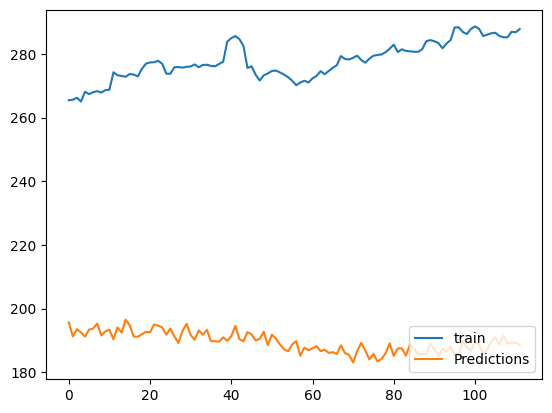

In [103]:
plt.figure()
plt.plot(datax['Close'][101:213].values)
plt.plot(valid[['predictions']])
plt.legend(['train', 'Predictions'], loc='lower right')
plt.show()

In [104]:
error_main = np.sqrt(np.abs(datax['Close'][101:213].values -valid[['predictions']].values))
print(error_main)

[[8.35268972 8.36347601 8.39938267 ... 9.55444954 9.54595793 9.59807636]
 [8.61331934 8.62377965 8.65860691 ... 9.78311559 9.77482262 9.82572716]
 [8.47909308 8.48971878 8.52509374 ... 9.66514874 9.65675447 9.7082781 ]
 ...
 [8.72380723 8.73413522 8.76852418 ... 9.88053102 9.87231988 9.92272427]
 [8.7307947  8.74111444 8.77547604 ... 9.886701   9.878495   9.92886803]
 [8.76308923 8.77337098 8.80760674 ... 9.91523138 9.90704901 9.95727759]]


In [108]:
error = np.mean(error_main, axis=1)
error

array([9.05244515, 9.29377137, 9.16935741, 9.22461484, 9.29681436,
       9.17700543, 9.15901522, 9.07258558, 9.27678607, 9.20675795,
       9.18077712, 9.3408302 , 9.14050052, 9.23100381, 9.00503972,
       9.10378721, 9.29617429, 9.29925263, 9.25782077, 9.21442866,
       9.22462892, 9.08945014, 9.1095905 , 9.13918412, 9.26234618,
       9.1592671 , 9.29376973, 9.40299279, 9.20104117, 9.07642108,
       9.26877164, 9.3490391 , 9.19083206, 9.26520497, 9.17973199,
       9.37186221, 9.37393294, 9.3825255 , 9.30887209, 9.36634129,
       9.29093128, 9.11388981, 9.33924283, 9.37492698, 9.2199018 ,
       9.25900554, 9.36179622, 9.33523274, 9.21548144, 9.43982823,
       9.26364829, 9.32980138, 9.42996877, 9.50746125, 9.54084303,
       9.42790797, 9.37354914, 9.61528047, 9.47858614, 9.52573085,
       9.49185555, 9.45678022, 9.53893921, 9.51521753, 9.56866269,
       9.55619734, 9.5862041 , 9.44273091, 9.57244371, 9.59904087,
       9.7242664 , 9.53659613, 9.40208459, 9.52803412, 9.67557

In [109]:
print(np.mean(error))

9.384611152770036


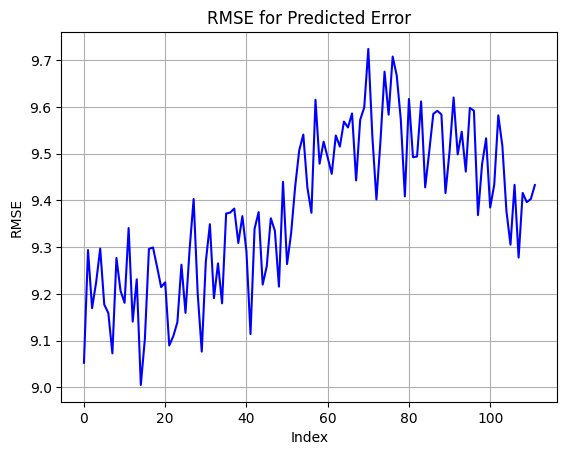

In [106]:
plt.plot(np.arange(112), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [107]:
final_pred

array([195.65092468, 191.2290802 , 193.52333069, 192.50819397,
       191.1725769 , 193.38319397, 193.71264648, 195.28636169,
       191.54412842, 192.83691406, 193.31404114, 190.35319519,
       194.05102539, 192.39042664, 196.50579834, 194.7199707 ,
       191.1844635 , 191.12728882, 191.8952179 , 192.69578552,
       192.50793457, 194.98046875, 194.6144104 , 194.07505798,
       191.81150818, 193.70803833, 191.22911072, 189.18937683,
       192.9420166 , 195.21684265, 191.69258118, 190.19995117,
       193.12954712, 191.75860596, 193.33320618, 189.7731781 ,
       189.73440552, 189.57342529, 190.94850159, 189.87651062,
       191.28179932, 194.53616333, 190.3828125 , 189.71578979,
       192.59501648, 191.87330627, 189.96153259, 190.45761108,
       192.67640686, 188.49607849, 191.78741455, 190.55886841,
       188.68191528, 187.21603394, 186.58085632, 188.72073364,
       189.74159241, 185.15643311, 187.76365662, 186.86868286,
       187.51220703, 188.17610168, 186.61714172, 187.06